In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
from src.processing.relation_extraction_evaluator import RelationExtractorEvaluator, RelationGranularMetrics
from src.config import get_config_from_stem

# Define path for the test dataset
data_stem="dialog-re-llama-35cls-clsTskOnl"
test_file_path = f"/home/murilo/RelNetCare/data/processed/{data_stem}/{data_stem}-test.json"

# get config and evaluator
config = get_config_from_stem(data_stem)
# evaluator = RelationExtractorEvaluator(config=config)

# Evaluate performance
df = evaluator.assess_performance_on_test_dataset(test_file_path, cap_size=None, return_details=True)

output_dir= /home/murilo/RelNetCare/data/processed/dialog-re-llama-35cls-clsTskOnl



Script successfully executed!
Couldn't calculate metrics. Some variables are not populated.
# INFERENCE REPORT
/home/murilo/RelNetCare/data/processed/dialog-re-llama-35cls-clsTskOnl/dialog-re-llama-35cls-clsTskOnl-test_20230902_162109.xlsx



In [7]:
config.output_dir

'/home/murilo/RelNetCare/data/processed/dialog-re-llama-11cls-clsTskOnl'

In [2]:
    {
        "id": "identity_353_001",
        "conversations": [
            {
                "from": "human",
                "value": "\nClassify the relation between the source and object entities below, given the input dialogue.\n\nOntology: \n- relations: {\"title\", \"date_of_birth\", \"visitors_of_place\", \"acquaintance\", \"origin\", \"dates\", \"alternate_names\", \"pet\", \"positive_impression\", \"client\", \"employee_or_member_of\", \"friends\", \"visited_place\", \"place_of_residence\", \"students\", \"major\", \"spouse\", \"other_family\", \"parents\", \"roommate\", \"siblings\", \"subordinate\", \"alumni\", \"residents_of_place\", \"boss\", \"neighbor\", \"children\", \"place_of_work\", \"age\", \"works\", \"unanswerable\", \"girl/boyfriend\", \"schools_attended\", \"employees_or_members\", \"negative_impression\"}\n\n\nInput:\n[\n \"Speaker 1: Um, Chandler, Ross, this is Robert.\",\n \"Speaker 2: Oh, hey.\",\n \"Speaker 3: Hi.\",\n \"Speaker 4: Hey.\",\n \"Speaker 1: You’ve have lipstick right here. That’s okay, it’s mine, we just kissed.\",\n \"Speaker 4: Oh.\",\n \"Speaker 2: So ah, isn’t a bit cold out for shorts?\",\n \"Speaker 3: Well, I’m from California.\",\n \"Speaker 2: Right, right. Sometimes you guys just burst into flames.\"\n]\n\nSubject: California (GPE)\nObject: Speaker 3 (PER)\nRelation:"
            },
            {
                "from": "gpt",
                "value": "residents_of_place"
            }
        ]
    }

In [15]:
x = "\nClassify the relation between the source and object entities below, given the input dialogue.\n\nOntology: \n- relations: {\"title\", \"date_of_birth\", \"visitors_of_place\", \"acquaintance\", \"origin\", \"dates\",\n\"alternate_names\", \"pet\", \"positive_impression\", \"client\", \"employee_or_member_of\", \"friends\",\n\"visited_place\", \"place_of_residence\", \"students\", \"major\", \"spouse\", \"other_family\", \"parents\",\n\"roommate\", \"siblings\", \"subordinate\", \"alumni\", \"residents_of_place\", \"boss\", \"neighbor\", \"children\",\n\"place_of_work\", \"age\", \"works\", \"unanswerable\", \"girl/boyfriend\", \"schools_attended\",\n\"employees_or_members\", \"negative_impression\"}\n\n\nInput:\n[\n \"Speaker 1: Um, Chandler, Ross, this is Robert.\",\n \"Speaker 2: Oh, hey.\",\n \"Speaker 3: Hi.\",\n \"Speaker 4: Hey.\",\n \"Speaker 1: You’ve have lipstick right here. That’s okay, it’s mine, we just kissed.\",\n \"Speaker 4: Oh.\",\n \"Speaker 2: So ah, isn’t a bit cold out for shorts?\",\n \"Speaker 3: Well, I’m from California.\",\n \"Speaker 2: Right, right. Sometimes you guys just burst into flames.\"\n]\n\nSubject: California (GPE)\nObject: Speaker 3 (PER)\nRelation:"

print(x)


Classify the relation between the source and object entities below, given the input dialogue.

Ontology: 
- relations: {"title", "date_of_birth", "visitors_of_place", "acquaintance", "origin", "dates",
"alternate_names", "pet", "positive_impression", "client", "employee_or_member_of", "friends",
"visited_place", "place_of_residence", "students", "major", "spouse", "other_family", "parents",
"roommate", "siblings", "subordinate", "alumni", "residents_of_place", "boss", "neighbor", "children",
"place_of_work", "age", "works", "unanswerable", "girl/boyfriend", "schools_attended",
"employees_or_members", "negative_impression"}


Input:
[
 "Speaker 1: Um, Chandler, Ross, this is Robert.",
 "Speaker 2: Oh, hey.",
 "Speaker 3: Hi.",
 "Speaker 4: Hey.",
 "Speaker 1: You’ve have lipstick right here. That’s okay, it’s mine, we just kissed.",
 "Speaker 4: Oh.",
 "Speaker 2: So ah, isn’t a bit cold out for shorts?",
 "Speaker 3: Well, I’m from California.",
 "Speaker 2: Right, right. Sometimes yo

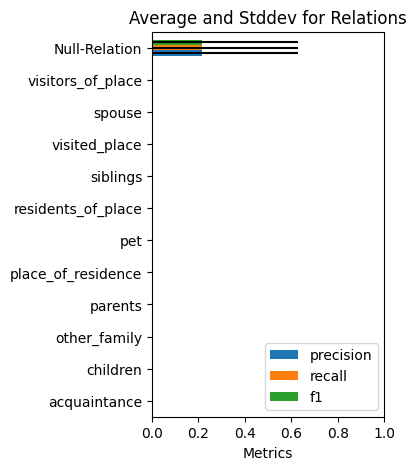

In [14]:

# Define your ontology
your_ontology = {
    "Null-Relation", "other_family", "siblings",
    "visited_place", "place_of_residence",
    "spouse", "pet", "acquaintance", "children",
    "visitors_of_place", "residents_of_place", "parents"
    }

# Usage
my_metrics = RelationGranularMetrics(df, your_ontology)
result = my_metrics.process()
chart_df = my_metrics.to_dataframe()
my_metrics.plot_metrics(chart_df)


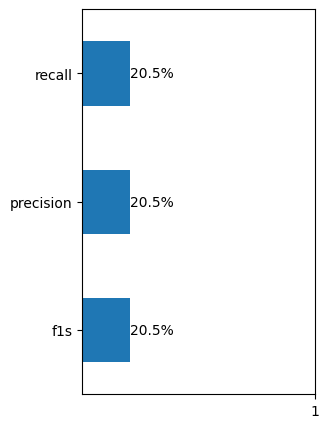

In [15]:
import matplotlib.pyplot as plt

# Your plotting code here
ax = df[['f1s', 'precision', 'recall']].mean().plot(kind='barh', alpha=1, figsize=(3, 5))

# Set x-axis tick labels
plt.xticks([1], ['1'])

# Adding data values on top of each bar
for bar in ax.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.1%}', 
             va='center', ha='left')

# Show the plot
plt.show()


<Axes: ylabel='Frequency'>

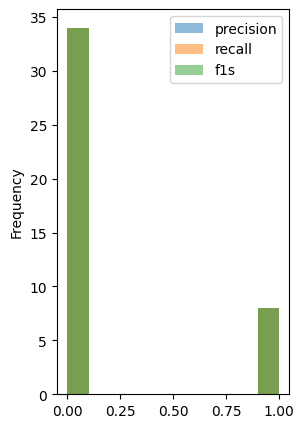

In [18]:
df[['precision', 'recall', 'f1s']].fillna(0).plot(kind='hist', alpha=0.5, figsize=(3, 5))


In [ ]:
print(config.preprompt)


Extract personal relevant entities, and their relations. Return only the jsonl format list. Extract entities and relations from the given dialogue input and generate a JSON list as output that is structured according to the entity and relation types from the ontology.

Ontology: 
- relations: {"place_of_residence", "siblings", "residents_of_place", "visited_place", "visitors_of_place", "other_family", "parents", "pet", "acquaintance", "children", "spouse"}
- types: {"ORG", "GPE", "PERSON", "DATE", "EVENT", “ANIMAL”}

Input:
[
"Speaker 1: Emma got a cat, Max.",
"Speaker 2: Nice! Who is Emma?",
"Speaker 1: She's my sister.",
]

Output:
[
{"subject": "Speaker 1", "subject_type": "PERSON", "relation": "siblings", "object": "Emma", "object_type": "PERSON"},
{"subject": "Emma", "subject_type": "PERSON", "relation": "siblings", "object": "Speaker 1", "object_type": "PERSON"},
{"subject": "Emma", "subject_type": "PERSON", "relation": "pet", "object": "Max", "object_type": "ANIMAL"},
{"subject

In [9]:
dialogue = 'Speaker 1: Hi, you are my father.\nSpeaker 2: Yes, I am your father'
# dialogue = 'Speaker 1: I went to Maryland.\nSpeaker 2: Why?\nSpeaker 1: I work at Google there.'
# dialogue = 'Speaker 1: I love my husband.\nSpeaker 2: Sweet! What is his name?\nSpeaker 1: John.'
# dialogue = 'Speaker 1: I love my husband.\nSpeaker 2: Sweet! '
jsonl = evaluator.infer_from_model(dialogue, preprompt=config.preprompt)
print(dialogue)

try:
    print(jsonl.replace('},', '},\n'))
except Exception as e:
    print(f'Exception={e}')
    print(jsonl)

Speaker 1: Hi, you are my father.
Speaker 2: Yes, I am your father

Extract personal relevant entities, and their relations. Return only the jsonl format list. Extract entities and relations from the given dialogue input and generate a JSON list as output that is structured according to the entity and relation types from the ontology.

Ontology: 
- relations: {"place_of_residence", "siblings", "residents_of_place", "visited_place", "visitors_of_place", "other_family", "parents", "pet", "acquaintance", "children", "spouse"}
- types: {"ORG", "GPE", "PERSON", "DATE", "EVENT", “ANIMAL”}

Input:
[
"Speaker 1: Hi, you are my father.",
"Speaker 2: Yes, I am your father",
]

Output:
[
{"subject": "Speaker 1", "subject_type": "PERSON", "relation": "siblings", "object": "Speaker 2", "object_type": "PERSON"},

{"subject": "Speaker 2", "subject_type": "PERSON", "relation": "siblings", "object": "Speaker 1", "object_type": "PERSON"},

{"subject": "Speaker 1", "subject_type": "PERSON", "relation": "